<a href="https://colab.research.google.com/github/twistin/Curso-Fastai/blob/master/classifier_tomatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf tomatos

In [2]:
# | export
! [ -e /content ] && pip install -Uqq fastbook

from fastbook import *
from fastai.vision.all import*

In [3]:
tomatos_types=('cherry tomato','raf tomato', 'Beefsteak tomato') 
path = Path('tomatos')

In [4]:
# | export
if not path.exists():
  path.mkdir()
  for o in tomatos_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} tomato')
    download_images(dest, urls=results)

In [5]:
# | export
fns = get_image_files(path)
fns

(#570) [Path('tomatos/Beefsteak tomato/f4b1c042-18cc-4bd4-9845-673d72c021d0.jpg'),Path('tomatos/Beefsteak tomato/dd1b0e18-3f5f-4351-b042-dd81c82de241.jpg'),Path('tomatos/Beefsteak tomato/2e3a7d23-c64c-483b-8a36-adbfe637986c.jpg'),Path('tomatos/Beefsteak tomato/fcfe6fa1-6ad1-4dce-ba35-cb586ff99c8a.jpg'),Path('tomatos/Beefsteak tomato/796f7fd9-f5cb-405d-aea2-45003edf5ce5.jpg'),Path('tomatos/Beefsteak tomato/06529e9c-dbea-46bc-8de7-600840cb3be7.jpg'),Path('tomatos/Beefsteak tomato/21f08a2e-8a08-4867-a74a-2b9cd0ea463a.jpg'),Path('tomatos/Beefsteak tomato/87467f7a-0ec4-4b13-b8b1-5b978ae3edce.jpg'),Path('tomatos/Beefsteak tomato/3a64d114-327d-4380-b70f-8064d687b3a4.jpeg'),Path('tomatos/Beefsteak tomato/e7c3f3c4-d15e-416f-b86b-d31ef308e6ab.jpg')...]

In [6]:
# | export
failed=verify_images(fns)
failed

(#7) [Path('tomatos/Beefsteak tomato/9cf2928c-09f9-47b2-9bf3-c2b90a0d9403.jpg'),Path('tomatos/Beefsteak tomato/653ee31f-616c-4cd0-bf33-501858d9b2cb.jpg'),Path('tomatos/Beefsteak tomato/0afc84b6-03c4-409d-a751-7a0d7634b9ad.jpg'),Path('tomatos/raf tomato/0524ea0c-abb6-4aea-9810-0ff6bda667ce.jpg'),Path('tomatos/raf tomato/137f4c9f-97cf-4d5e-8e83-e3d7aadb03cb.jpg'),Path('tomatos/raf tomato/29fbea85-1c53-4541-81b3-99953b8528f5.jpg'),Path('tomatos/cherry tomato/0763eda4-23b6-4135-86df-cbe47015ec37.jpg')]

In [7]:
# | export 
failed.map(Path.unlink)


(#7) [None,None,None,None,None,None,None]

In [9]:
# | export
tomatos = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

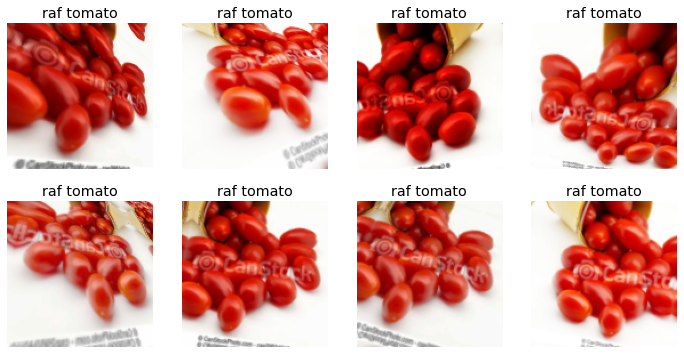

In [10]:
# | export 
tomatos = tomatos.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = tomatos.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [12]:
# | export
learn= vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.803682,1.039115,0.366071,00:19


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,1.181038,0.630606,0.250000,00:18
1,1.054070,0.495002,0.178571,00:19
2,0.900813,0.453928,0.187500,00:19
3,0.812758,0.436703,0.169643,00:19


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [13]:
labels = learn.dls.vocab
labels

['Beefsteak tomato', 'cherry tomato', 'raf tomato']

In [14]:
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

In [8]:
 !pip install gradio
 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 6.9 MB/s 
     |████████████████████████████████| 2.3 MB 46.4 MB/s 
     |████████████████████████████████| 84 kB 2.9 MB/s 
     |████████████████████████████████| 212 kB 72.5 MB/s 
     |████████████████████████████████| 57 kB 4.5 MB/s 
     |████████████████████████████████| 270 kB 61.9 MB/s 
     |████████████████████████████████| 54 kB 4.0 MB/s 
     |████████████████████████████████| 112 kB 68.3 MB/s 
     |████████████████████████████████| 55 kB 3.7 MB/s 
     |████████████████████████████████| 84 kB 4.2 MB/s 
     |████████████████████████████████| 63 kB 2.5 MB/s 
     |████████████████████████████████| 80 kB 10.3 MB/s 
     |████████████████████████████████| 68 kB 7.7 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 594 kB 64.6 MB/s 
     |████████████████████████████████| 4.0 MB 53

In [15]:
import gradio as gr
gr.Interface(fn=predict, inputs=gr.inputs.Image(shape=(512, 512)), outputs=gr.outputs.Label(num_top_classes=3)).launch(share=True)

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://17757.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f1dac2f17d0>,
 'http://127.0.0.1:7860/',
 'https://17757.gradio.app')